# Python test - Quantum Motion

**Steps:**
- Load the array and visualize data.
- Convert each line described by the array into cartesian coordinates.
- Split the array into two new arrays: one with negative gradient lines and one with positive gradient lines.
- Find the x-intercept of each line.
- Create a new array that contains the x-intercept difference for each line of positive gradient to each line of negative gradient.
- Construct a dataframe that holds the 100 pairs that have the closest x-intercepts.
- Save this dataframe to a file.


## Load data

In [1]:
import numpy as np
import pandas as pd

#Load the array from the .npy file
file_path = "data.npy"
lines_array = np.load(file_path)

#Save it as a pandas dataframe
df = pd.DataFrame(lines_array, columns = ['r','theta','score'])
df

,r,theta,score
0,-68.0,2.146755,68.0
1,-71.0,2.164208,67.0
2,-81.0,2.216568,63.0
3,-72.0,2.146755,59.0
4,-100.0,2.164208,59.0
...,...,...,...
774,-208.0,2.879793,21.0
775,-165.0,2.914700,21.0
776,-190.0,2.932153,21.0
777,-212.0,2.949606,21.0


Print the ranges of our values

In [2]:
# Get the maximum and minimum values 
max_theta_value = df['theta'].max()
min_theta_value = df['theta'].min()
max_r_value = df['r'].max()
min_r_value = df['r'].min()

# Print the maximum and minimum values
print("Maximum theta value:", max_theta_value)
print("Minimum theta value:", min_theta_value)

print("Maximum r value:", max_r_value)
print("Minimum r value:", min_r_value)

Maximum theta value: 3.1241393
Minimum theta value: 0.0
Maximum r value: 239.0
Minimum r value: -234.0


A value of 0 for theta would mean that the slope won't have y intercept.

## Convert to cartesian coordinates

In [3]:
def polar_to_cartesian(r, theta):
    """
    Convert polar coordinates to Cartesian coordinates (x, y).

    Parameters:
    - r: NumPy array containing the lengths of the normal vectors (r-values) of the lines.
    - theta: NumPy array containing the angles (theta-values) of the lines in radians.

    Returns:
    - x: NumPy array containing the x-coordinates of the lines.
    - y: NumPy array containing the y-coordinates of the lines.
    """

    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    return x, y

x, y = polar_to_cartesian(lines_array[:, 0], lines_array[:, 1])

#update dataframe with cartesian coordinates
df['x'] = x
df['y'] = y

## Split lines with positive and negative gradients

In [4]:
positive_gradient_lines = df[df['y'] >= 0]
negative_gradient_lines = df[df['y'] < 0]

Visualize the data

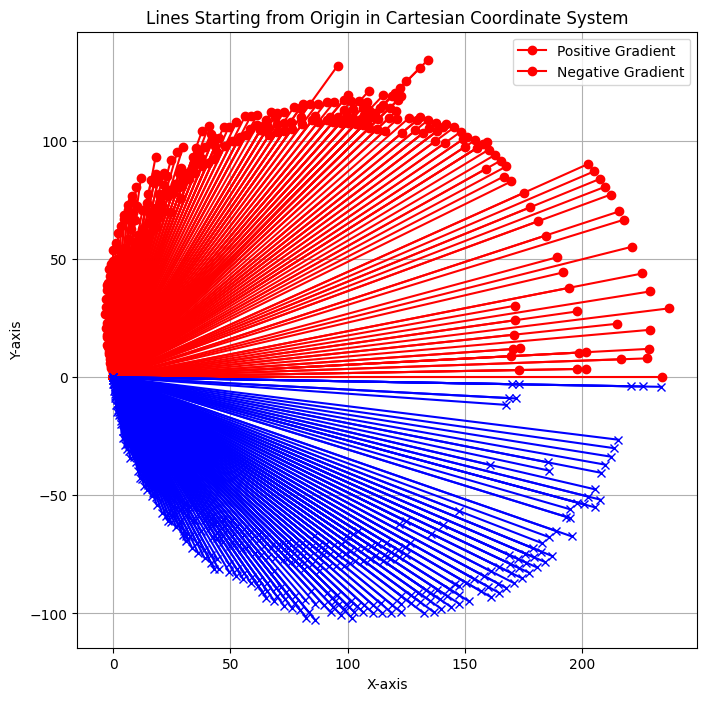

In [5]:
import matplotlib.pyplot as plt
# Plot the lines starting from the origin
plt.figure(figsize=(8, 8))

# Plot positive gradient lines in red
for x_val, y_val in zip(positive_gradient_lines['x'], positive_gradient_lines['y']):
    plt.plot([0, x_val], [0, y_val], color='red', marker='o')

# Plot negative gradient lines in blue
for x_val, y_val in zip(negative_gradient_lines['x'], negative_gradient_lines['y']):
    plt.plot([0, x_val], [0, y_val], color='blue', marker='x')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(['Positive Gradient', 'Negative Gradient'])
plt.title('Lines Starting from Origin in Cartesian Coordinate System')
plt.grid(True)

# Show the plot
plt.show()

## Find the x and y intercept, and the slope from the tangent

In [6]:
def calculate_tangent_line(x, y, theta):
    """
    Calculate the properties of the tangent line given the Cartesian coordinates (x, y) 
    and the angle theta of the original line in polar coordinates.

    Parameters:
        x (float or array-like): The x-coordinate(s) of the point(s) on the original line.
        y (float or array-like): The y-coordinate(s) of the point(s) on the original line.
        theta (float): The angle in radians of the original line with respect to the x-axis.

    Returns:
        slope_tangent (float or array-like): The slope of the tangent line perpendicular to 
                                            the original line.
        x_intercept_tangent (float or array-like): The x-intercept(s) of the tangent line.
        y_intercept_tangent (float or array-like): The y-intercept(s) of the tangent line.
    """
    # Calculate the slope of the original line

    slope_original = np.tan(theta)
    tangent_theta = 0

    # Calculate the slope of the tangent line (perpendicular to the original line)
    #slope_tangent = np.tan(tangent_theta)
    slope_tangent = -1 / slope_original

    # Calculate the x and y-intercepts of the tangent line
    y_intercept_tangent = y - np.multiply(slope_tangent, x)
    x_intercept_tangent = np.divide(-y_intercept_tangent, slope_tangent)

    return slope_tangent, tangent_theta, x_intercept_tangent, y_intercept_tangent


In [7]:
#update positive gradient lines
m_pos, theta_pos, x_int_pos, y_int_pos = calculate_tangent_line(positive_gradient_lines['x'].values, positive_gradient_lines['y'], positive_gradient_lines['theta'].values)
positive_gradient_lines['tangent_slope'] = m_pos
positive_gradient_lines['tangent_theta'] = theta_pos
positive_gradient_lines['tangent_x_int'] = x_int_pos
positive_gradient_lines['tangent_y_int'] = y_int_pos

#update negative gradient lines
m_neg, theta_neg, x_int_neg, y_int_neg = calculate_tangent_line(negative_gradient_lines['x'].values, negative_gradient_lines['y'], negative_gradient_lines['theta'].values)
negative_gradient_lines['tangent_slope'] = m_neg
negative_gradient_lines['tangent_theta'] = theta_neg
negative_gradient_lines['tangent_x_int'] = x_int_neg
negative_gradient_lines['tangent_y_int'] = y_int_neg

/var/folders/vy/v_4tg6t57js6cy8llt2tqdh80000gn/T/ipykernel_6943/2240980487.py:24: RuntimeWarning: divide by zero encountered in divide
  slope_tangent = -1 / slope_original
/var/folders/vy/v_4tg6t57js6cy8llt2tqdh80000gn/T/ipykernel_6943/2678439906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_gradient_lines['tangent_slope'] = m_pos
/var/folders/vy/v_4tg6t57js6cy8llt2tqdh80000gn/T/ipykernel_6943/2678439906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_gradient_lines['tangent_the

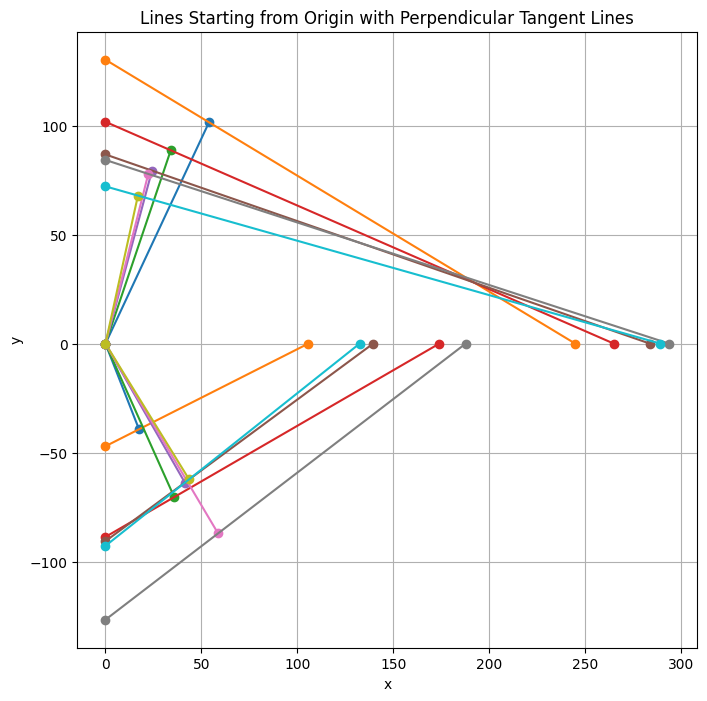

In [8]:
# Plot the lines starting from the origin and their corresponding tangent lines
plt.figure(figsize=(8, 8))
count = 0
for i, row in negative_gradient_lines[50:55].iterrows():
    # Plot the line starting from the origin to (x, y)
    plt.plot([0, row['x']], [0, row['y']], marker='o', label='Original Line')

    #Plot the tangent line
    plt.plot([0, row['tangent_x_int']], [row['tangent_y_int'],0], marker='o', label='Tangent Line')

for i, row in positive_gradient_lines[50:55].iterrows():
    # Plot the line starting from the origin to (x, y)
    plt.plot([0, row['x']], [0, row['y']], marker='o', label='Original Line')

    #Plot the tangent line
    plt.plot([0, row['tangent_x_int']], [row['tangent_y_int'],0], marker='o', label='Tangent Line')

# Set plot options
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lines Starting from Origin with Perpendicular Tangent Lines')
plt.grid(True)

plt.show()


In [9]:
positive_gradient_lines.sort_values(by='tangent_x_int', ascending= False)
negative_gradient_lines.sort_values(by='tangent_x_int', ascending= True)

,r,theta,score,x,y,tangent_slope,tangent_theta,tangent_x_int,tangent_y_int
749,-1.0,1.745329,21.0,0.173648,-0.984808,0.176327,0,5.758770,-1.015427
262,-1.0,1.710423,27.0,0.139173,-0.990268,0.140541,0,7.185297,-1.009827
216,-1.0,1.675516,28.0,0.104529,-0.994522,0.105104,0,9.566768,-1.005508
64,-3.0,1.815142,34.0,0.725766,-2.910887,0.249328,0,12.400698,-3.091841
391,-2.0,1.692969,25.0,0.243739,-1.985092,0.122785,0,16.411026,-2.015020
...,...,...,...,...,...,...,...,...,...
568,-213.0,2.879793,23.0,205.742203,-55.128475,3.732049,0,220.513840,-822.968567
662,-214.0,2.897247,22.0,207.643280,-51.771278,4.010782,0,220.551315,-884.583191
668,-221.0,3.124139,22.0,220.966339,-3.856993,57.289787,0,221.033661,-12662.971680
667,-226.0,3.124139,22.0,225.965576,-3.944256,57.289787,0,226.034424,-12949.463867


## Calculate x-intercept differences

In [10]:
def calculate_x_intercept_differences(pos_df, neg_df):
    """
    Calculate the absolute differences between the x-intercepts of positive and negative gradient lines.

    Parameters:
        pos_df (pandas.DataFrame): DataFrame containing the x-intercepts of positive gradient lines.
        neg_df (pandas.DataFrame): DataFrame containing the x-intercepts of negative gradient lines.

    Returns:
        x_intercept_differences (numpy.ndarray): NumPy array containing the absolute differences between 
                                                 the x-intercepts of positive and negative gradient lines.
    """
    # Extract the x-intercepts as NumPy arrays for positive and negative gradients
    pos_x_intercepts = pos_df['tangent_x_int'].values
    neg_x_intercepts = neg_df['tangent_x_int'].values

    # Calculate the absolute differences between x-intercepts using NumPy broadcasting
    x_intercept_differences = np.abs(pos_x_intercepts[:, np.newaxis] - neg_x_intercepts)

    return x_intercept_differences

differences = calculate_x_intercept_differences(positive_gradient_lines, negative_gradient_lines)

## Keep the 100 pairs that have the closest x-intercepts

In [11]:
import pandas as pd
import numpy as np

def get_closest_pairs(pos_df, neg_df, x_intercept_differences, num_pairs=100):
    """
    Find the closest pairs of lines between positive and negative gradient lines based on x-intercept differences.

    Parameters:
        pos_df (pandas.DataFrame): DataFrame containing information about positive gradient lines.
        neg_df (pandas.DataFrame): DataFrame containing information about negative gradient lines.
        x_intercept_differences (numpy.ndarray): NumPy array containing the absolute differences between 
                                                 the x-intercepts of positive and negative gradient lines.
        num_pairs (int, optional): Number of closest pairs to retrieve. Default is 100.

    Returns:
        closest_pairs_df (pandas.DataFrame): DataFrame containing information about the closest pairs of lines.
                                             It includes the following columns:
                                             - 'Positive Line Index': Row index of the positive gradient line in pos_df.
                                             - 'Negative Line Index': Row index of the negative gradient line in neg_df.
                                             - 'Positive X-Intercept': The x-intercept of the positive gradient line.
                                             - 'Negative X-Intercept': The x-intercept of the negative gradient line.
                                             - 'X-Intercept Difference': The absolute difference between 
                                               the x-intercepts of the positive and negative gradient lines.
    """
    # Flatten the x-intercept differences array and sort to get the 100 smallest differences
    sorted_indices = np.argsort(x_intercept_differences.flatten())[:num_pairs]

    # Initialize lists to store the pairs of lines and their corresponding x-intercept differences
    positive_lines = []
    negative_lines = []
    pos_x_intercepts = []
    neg_x_intercepts = []
    pos_y_intercepts = []
    neg_y_intercepts = []
    x_intercept_diffs = []
    scores = [] 

    # Extract the pairs of lines, x-intercepts, and x-intercept differences using the sorted indices
    for idx in sorted_indices:
        pos_idx, neg_idx = np.unravel_index(idx, x_intercept_differences.shape)
        positive_lines.append(pos_df.index[pos_idx])  # Row index as line identifier for positive lines
        negative_lines.append(neg_df.index[neg_idx])  # Row index as line identifier for negative lines
        pos_x_intercepts.append(pos_df.iloc[pos_idx]['tangent_x_int'])
        neg_x_intercepts.append(neg_df.iloc[neg_idx]['tangent_x_int'])
        pos_y_intercepts.append(pos_df.iloc[pos_idx]['tangent_y_int'])
        neg_y_intercepts.append(neg_df.iloc[neg_idx]['tangent_y_int'])
        x_intercept_diffs.append(x_intercept_differences[pos_idx, neg_idx])
        scores.append(pos_df.iloc[pos_idx]['score']+neg_df.iloc[neg_idx]['score'])

    # Create a new DataFrame to hold the 100 closest pairs
    closest_pairs_df = pd.DataFrame({
        'Positive Line Index': positive_lines,
        'Negative Line Index': negative_lines,
        'Positive X-Intercept': pos_x_intercepts,
        'Negative X-Intercept': neg_x_intercepts,
        'Positive Y-Intercept': pos_y_intercepts,
        'Negative Y-Intercept': neg_y_intercepts,
        'X-Intercept Difference': x_intercept_diffs,
        'Score': scores
    })

    return closest_pairs_df


closest_pairs = get_closest_pairs(positive_gradient_lines, negative_gradient_lines, differences)

## Save as csv

In [12]:
closest_pairs.to_csv('closest_pairs.csv', index=False)